#1.Import Library




In [ ]:
!pip install varname

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install keras-metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 5.1 MB/s 


In [ ]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=d6eb255963f1f3346e4813801e9751aed899073cd7c35be2847f465ff5eb26d8
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
import nltk
import pandas as pd
import re
import tensorflow as tf
import time
import multiprocessing
import io
import gensim
import numpy as np
import matplotlib.pyplot as plt
import keras_metrics as km
import pickle
import keras
from sklearn.model_selection import KFold # import KFold
from sklearn.model_selection import StratifiedKFold
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, Activation, Embedding, LSTM, Bidirectional, Dropout, GRU
from keras import regularizers
from tensorflow.keras.utils import to_categorical
from keras.models import load_model
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from nltk.tokenize import TweetTokenizer
from collections import defaultdict
from datetime import timedelta
from gensim.models import word2vec
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score, multilabel_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from varname import nameof
from numpy import savetxt
import seaborn as sns
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report

from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import wget

from numpy import asarray
from numpy import savetxt

#2.Load Data

In [ ]:
#simpan path dataset
path_data_sentimen = "/content/drive/MyDrive/1 Rizki Folder/Hibah bersama Dosen/LSTM vs NB Sentiment/ulasan-10des-data_sentimen.csv"
data_sentimen = pd.read_csv(path_data_sentimen, sep=",", header=[0], encoding="UTF-8")
# path_test_data = "/content/drive/My Drive/Thesis/Tesis/program/data/dataset/new_dataset/test_data.csv"
# test_data = pd.read_csv(path_test_data, sep=";", header=[0], encoding="UTF-8")

In [ ]:
data_sentimen

,ulasan,Atraksi,Aksesbilitas,Fasilitas,Akomodasi
0,Danau Toba sangat cocok untuk dijadikan kunjun...,1,-1,-1,1
1,Pemandangan yang luar biasa dengan pesona sang...,1,-1,1,-1
2,Sangat bahagia apabila saya bisa mewujudkan ke...,1,-1,-1,1
3,datang kesini sudah lama dan semoga semakin te...,1,-1,-1,-1
4,Visit ke sini Desember 2018 bareng keluarga. T...,1,0,-1,1
...,...,...,...,...,...
4542,"Kuil indah, panduan menarik dan sejarah",1,-1,-1,-1
4543,kuil yang mengesankan -- dapatkan panduan,1,-1,-1,-1
4544,Salah satu monumen buddha terbesar di dunia!,1,-1,-1,-1
4545,Kuil terbesar di indonesia,1,-1,-1,-1


In [ ]:
data_sentimen.columns = ['ulasan','Atraksi', 'Aksesbilitas', 'Fasilitas', 'Akomodasi']

#3.Implementasi Preprocessing

In [ ]:
#menyimpan tweet. (tipe data series pandas)
data_content = data_sentimen['ulasan']

##3.1. Casefolding

In [ ]:
# casefolding
data_casefolding = data_content.str.lower()
data_casefolding.head()

0    danau toba sangat cocok untuk dijadikan kunjun...
1    pemandangan yang luar biasa dengan pesona sang...
2    sangat bahagia apabila saya bisa mewujudkan ke...
3    datang kesini sudah lama dan semoga semakin te...
4    visit ke sini desember 2018 bareng keluarga. t...
Name: ulasan, dtype: object

##3.2. Filtering

In [ ]:
#filtering

#url
filtering_url = [re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", tweet) for tweet in data_casefolding]
#cont
filtering_cont = [re.sub(r'\(cont\)'," ", tweet)for tweet in filtering_url]
#punctuatuion
filtering_punctuation = [re.sub('[!"”#$%&’()*+,-./:;<=>?@[\]^_`{|}~]', ' ', tweet) for tweet in filtering_cont]  #hapus simbol'[!#?,.:";@()-_/\']'
#  hapus #tagger
filtering_tagger = [re.sub(r'#([^\s]+)', '', tweet) for tweet in filtering_punctuation]
#numeric
filtering_numeric = [re.sub(r'\d+', ' ', tweet) for tweet in filtering_tagger]

# # filtering RT , @ dan #
# fungsi_clen_rt = lambda x: re.compile('\#').sub('', re.compile('rt @').sub('@', x, count=1).strip())
# clean = [fungsi_clen_rt for tweet in filtering_numeric]

data_filtering = pd.Series(filtering_numeric)


In [ ]:
data_filtering

0       ketua adalah pemimpin berprinsip dan cakap dlm...
1       dahlan iskan  saya akui saya payah  direktur u...
2         metro tv  hatta rajasa ingin jadi ri      se...
3          agree     juta rt  thinkwl prof  mahfud md ...
4       ternyata pak mahfud md merasa tidak layak menj...
                              ...                        
1340    siapa tokoh sejarah yang paling kamu benci   æ...
1341    prabowo subianto adalah tokoh yang berwibawa d...
1342     wah aburizal bakrie nyanyinya keren di idol t...
1343     eko miharjah  anasurbaningrum insya allah ban...
1344      metropagi saya selalu mendukung pak mahfud m...
Length: 1345, dtype: object

## 3.3. Tokenisasi

In [ ]:
# #tokenize
tknzr = TweetTokenizer()
data_tokenize = [tknzr.tokenize(tweet) for tweet in data_filtering]

In [ ]:
data_tokenize[:5]

[['ketua',
  'adalah',
  'pemimpin',
  'berprinsip',
  'dan',
  'cakap',
  'dlm',
  'menentukan',
  'pilihan',
  'gerindra',
  'menang',
  'prabowo',
  'presiden'],
 ['dahlan',
  'iskan',
  'saya',
  'akui',
  'saya',
  'payah',
  'direktur',
  'utama',
  'pln',
  'dahlan',
  'iskan',
  'merasa',
  'payah',
  'dalam',
  'mengelola',
  'kelistrik'],
 ['metro', 'tv', 'hatta', 'rajasa', 'ingin', 'jadi', 'ri', 'serakah', 'nihhh'],
 ['agree',
  'juta',
  'rt',
  'thinkwl',
  'prof',
  'mahfud',
  'md',
  'adalah',
  'sosok',
  'pemimpin',
  'teladan'],
 ['ternyata',
  'pak',
  'mahfud',
  'md',
  'merasa',
  'tidak',
  'layak',
  'menjadi',
  'calon',
  'presiden',
  'hanya',
  'ingin',
  'menjadi',
  'penegak',
  'hukum',
  'politic']]

##3.4. Konversi Slangword

In [ ]:
#slang word
path_dataslang = open("/content/drive/MyDrive/Thesis/Tesis/program/data/dataset/kamus_kata_baku_clear.csv")
dataslang = pd.read_csv(path_dataslang, encoding = 'utf-8', header=None, sep=";")

def replaceSlang(word):
  if word in list(dataslang[0]):
    indexslang = list(dataslang[0]).index(word)
    return dataslang[1][indexslang]
  else:
    return word

data_formal = []
for data in data_tokenize:
  data_clean = [replaceSlang(word) for word in data]
  data_formal.append(data_clean)
len_data_formal = len(data_formal)
print(data_formal)
len_data_formal

[['ketua', 'adalah', 'pemimpin', 'berprinsip', 'dan', 'cakap', 'dalam', 'menentukan', 'pilihan', 'gerindra', 'menang', 'prabowo', 'presiden'], ['dahlan', 'iskan', 'saya', 'akui', 'saya', 'payah', 'direktur', 'utama', 'pln', 'dahlan', 'iskan', 'merasa', 'payah', 'dalam', 'mengelola', 'kelistrik'], ['metro', 'tv', 'hatta', 'rajasa', 'ingin', 'jadi', 'ri', 'serakah', 'ini'], ['agree', 'juta', ' ', 'thinkwl', 'prof', 'mahfud', 'md', 'adalah', 'sosok', 'pemimpin', 'teladan'], ['ternyata', 'bapak', 'mahfud', 'md', 'merasa', 'tidak', 'layak', 'menjadi', 'calon', 'presiden', 'hanya', 'ingin', 'menjadi', 'penegak', 'hukum', 'politik'], ['megawati', 'adalah', 'calon', 'kandidat', 'presiden', 'paling', 'kuat', 'sejauh', 'ini', 'menurutku', nan, 'diantigamartil'], ['hatta', 'rajasa', 'dan', 'surya', 'paloh', 'tidak', 'cocok', 'jadi', 'presiden'], ['mahfud', 'md', 'berpeluang', 'kuat', 'jadi', 'cawapres'], ['mahfud', 'md', 'teringat', 'semangat'], ['rahmat', 'gobel', 'mahfud', 'md', 'cakap', 'tuh',

1345

## 3.5. Stopword

In [ ]:
nltk.download('stopwords')
default_stop_words = nltk.corpus.stopwords.words('indonesian')
stopwords = set(default_stop_words)

def removeStopWords(line, stopwords):
  words = []
  for word in line:  
    word=str(word)
    word = word.strip()
    if word not in stopwords and word != "" and word != "&":
      words.append(word)

  return words
reviews = [removeStopWords(line,stopwords) for line in data_formal]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# pickle.dump(reviews, open("/content/drive/My Drive/Thesis/Tesis/program/data/model/NVB/reviews.pickle", "wb"))

In [ ]:
# Read list to memory
def read_list():
    # for reading also binary mode is important
    with open('/content/drive/MyDrive/1 Rizki Folder/Hibah bersama Dosen/LSTM vs NB Aspek/reviews', 'rb') as fp:
        n_list = pickle.load(fp)
        return n_list
#Read
r_names = read_list()
print(r_names)

[['danau', 'toba', 'cocok', 'jadi', 'kunjung', 'wisata', 'tawar', 'pandang', 'indah', 'danau', 'toba', 'milik', 'hotel', 'hotel', 'taraf', 'internasional', 'jadi', 'inap'], ['pandang', 'pesona', 'sentuh', 'sejuk', 'jiwa', 'fasilitas', 'udara', 'segar'], ['bahagia', 'wujud', 'keluarga', 'libur', 'danau', 'toba', 'indah', 'danau', 'toba', 'pancar', 'kebahagian', 'sendiri', 'unjung', 'danau', 'keliling', 'gunung', 'indah', 'tambah', 'sejuk', 'kota', 'wisata', 'budaya', 'kental', 'kunjung', 'museum', 'pakai', 'baju', 'busana', 'adat', 'batak', 'tari', 'batak', 'kena', 'biaya', 'akomodasi', 'rupiah', 'unjung', 'pakai', 'baju', 'adat', 'batak', 'tari', 'sigale', 'gale', 'hitung', 'kepala', 'lupa', 'belanja', 'sorvenir', 'khas', 'toba', 'pakai', 'sarung', 'libur', 'murah', 'inap', 'sekitar', 'danau', 'toba'], ['kesini', 'moga', 'tetata', 'rapi', 'bersihmenjadi', 'salah', 'objek', 'wisata', 'dukung', 'perintah', 'danau', 'tobasaya', 'senang', 'danau', 'toba', 'kenal', 'dunia'], ['visit', 'dese

#4.Konversi Kalimat

In [ ]:
#Pembuatan Kamus kata
t  = Tokenizer()
fit_text = r_names
t.fit_on_texts(fit_text)

#Pembuatan Id masing-masing kata
sequences = t.texts_to_sequences(r_names)

#hapus duplikat kata yang muncul
list_set_sequence = [list(dict.fromkeys(seq)) for seq in sequences]

#mencari max length sequence
def FindMaxLength(lst): 
    maxList = max((x) for x in lst) 
    maxLength = max(len(x) for x in lst ) 
    return maxList, maxLength 
      
# Driver Code 
max_seq, max_length_seq = FindMaxLength(list_set_sequence)
jumlah_index = len(t.word_index) +1

print('jumlah index : ',jumlah_index,'\n')
print('word_index : ',t.word_index,'\n')
print('index kalimat asli     : ', sequences,'\n')
print('kalimat tanpa duplikat : ',list_set_sequence,'\n')
print('panjang max kalimat : ', max_length_seq,'kata','\n')
# print('kalimat terpanjang setelah dihapus duplikat : ', max_seq,'\n')

count_word = [len(i) for i in list_set_sequence]
print('list panjang kalimat : ', count_word)
max_len_word = max(count_word)
print(max_len_word)

jumlah index :  7243 

word_index :  {'pulau': 1, 'pantai': 2, 'indah': 3, 'candi': 4, 'jalan': 5, 'pandang': 6, 'borobudur': 7, 'kunjung': 8, 'danau': 9, 'pasir': 10, 'unjung': 11, 'bagus': 12, 'laut': 13, 'wisata': 14, 'bukit': 15, 'orang': 16, 'nikmat': 17, 'matahari': 18, 'salah': 19, 'toba': 20, 'bromo': 21, 'alam': 22, 'lombok': 23, 'bersih': 24, 'ribu': 25, 'masuk': 26, 'anak': 27, 'kuta': 28, 'makan': 29, 'foto': 30, 'takjub': 31, 'harga': 32, 'bawa': 33, 'batu': 34, 'putih': 35, 'indonesia': 36, 'kali': 37, 'gunung': 38, 'dunia': 39, 'pergi': 40, 'sewa': 41, 'pagi': 42, 'milik': 43, 'puncak': 44, 'terbit': 45, 'wisatawan': 46, 'lokasi': 47, 'jual': 48, 'kota': 49, 'sunrise': 50, 'kapal': 51, 'tarik': 52, 'komodo': 53, 'hotel': 54, 'panas': 55, 'sejarah': 56, 'malam': 57, 'banget': 58, 'keliling': 59, 'baik': 60, 'ikan': 61, 'inap': 62, 'lupa': 63, 'libur': 64, 'tanjung': 65, 'rupiah': 66, 'sana': 67, 'bayar': 68, 'bangun': 69, 'teman': 70, 'sayang': 71, 'hati': 72, 'kuil': 73,

In [ ]:
# min_len_word=min(count_word)
# print(min_len_word)

## 4.1. Padding

In [ ]:
#Padding
from keras.preprocessing.sequence import pad_sequences
padding= pad_sequences([list(list_set_sequence[i]) for i in range(len(list_set_sequence))], 
                       maxlen= max_len_word, padding='pre')
padding[:10]

array([[   0,    0,    0, ..., 3390,  531,   62],
       [   0,    0,    0, ...,  141,  163,  166],
       [   0,    0,    0, ...,  112,   62,  212],
       ...,
       [   0,    0,    0, ...,   97,  870,    8],
       [   0,    0,    0, ...,  127,    6, 2522],
       [   0,    0,    0, ...,  240,  155,  103]], dtype=int32)

In [ ]:
# load numpy array from csv file
from numpy import loadtxt
# load array
padding = loadtxt('/content/drive/MyDrive/1 Rizki Folder/Hibah bersama Dosen/LSTM vs NB Aspek/aspek_clear.csv', delimiter=',')
# print the array
padding.shape

(4547, 264)

#5.Word2vec

In [ ]:
# #Baca Korpus Wikipedia Indonesia


# if __name__ == '__main__':
  
#     start_time = time.time()
#     print('Streaming wiki...')
#     id_wiki = gensim.corpora.WikiCorpus('/content/drive/My Drive/Thesis/Tesis/program/data/model/word_embedding/idwiki-latest-pages-articles.xml.bz2', lemmatize=False, dictionary={})
#     article_count = 0

#     with io.open('/content/drive/My Drive/Thesis/Tesis/program/data/model/word_embedding/idwiki.txt', 'w', encoding='utf-8') as wiki_txt:
#         for text in id_wiki.get_texts():

#             wiki_txt.write(" ".join(text) + '\n')
#             article_count += 1

#             if article_count % 10000 == 0:
#                 print('{} articles processed'.format(article_count))

#         print('total: {} articles'.format(article_count))

#     finish_time = time.time()
#     print('Elapsed time: {}'.format(timedelta(seconds=finish_time-start_time)))

In [ ]:
# #Pembuatan Model Word2Vec

# start_time = time.time()
# print('Training Word2Vec Model...')
# sentences = word2vec.LineSentence('/content/drive/My Drive/Thesis/Tesis/program/data/model/word_embedding/idwiki.txt')
# id_w2v = word2vec.Word2Vec(sentences, size=300, window = 10, sg = 0,  min_count = 5, workers=multiprocessing.cpu_count()-1)
# id_w2v.save('/content/drive/My Drive/Thesis/Tesis/program/data/model/word_embedding/skip_gram/word2vec_skipgram_300.model')
# finish_time = time.time()

# print('Finished. Elapsed time: {}'.format(timedelta(seconds=finish_time-start_time)))


In [ ]:
# #Panggil model word2vec
# model_w2v = gensim.models.Word2Vec.load('/content/drive/My Drive/Thesis/Tesis/program/data/model/word_embedding/skip_gram/word2vec_skipgram_300.model')


#6.Implementasi LSTM (Klasifikasi Sentimen)

In [ ]:
class READ_DATA:
  aspek = ''
  padding = ''
  data_sentimen_Atraksi = ""
  data_sentimen_Aksesbilitas = "" 
  data_sentimen_Fasilitas = ""
  data_sentimen_Akomodasi = "" 
  # data_sentimen_kontinuitas = ""
  def __init__(self, data_sentimen, padding):
    self.data_sentimen_Atraksi = data_sentimen['Atraksi']
    self.data_sentimen_Aksesbilitas = data_sentimen['Aksesbilitas']
    self.data_sentimen_Fasilitas = data_sentimen['Fasilitas']
    self.data_sentimen_Akomodasi = data_sentimen['Akomodasi']
    # self.data_sentimen_kontinuitas = data_sentimen['kontinuitas']
    self.padding = padding

  def get_data_sentimen(self, aspek):
    data_sentimen= getattr(self, f'data_sentimen_{aspek}')
    data_sentimen_list = data_sentimen.to_list()
    # print(type(data_sentimen_list[0]))

    #filter hapus data yang tidak memiliki sentimen (-1)
    x_, y_ = [],[]    
    for i, j in zip(padding, data_sentimen_list):
        if j != -1:
            x_.append(i)
            y_.append(j)
    return x_, y_

In [ ]:
# Ubah kategori (Atraksi, Aksesbilitas, Fasilitas dan Akomodasi)
read_data = READ_DATA(data_sentimen, padding)
x_content_sentimen_lstm, y_label_sentimen_lstm = read_data.get_data_sentimen('Atraksi')

In [ ]:
unique_labels(y_label_sentimen_lstm)

array([0, 1])

In [ ]:
# #Panggil Data target aspek (y)
# data_aspek_Atraksi = data_aspek['Atraksi']
# data_aspek_Aksesbilitas = data_aspek['Aksesbilitas']
# data_aspek_Fasilitas = data_aspek['Fasilitas']
# data_aspek_Akomodasi = data_aspek['Akomodasi ']

# #Panggil Data target aspek (y)
# data_sentimen_Atraksi = data_sentimen['Atraksi']
# data_sentimen_Aksesbilitas = data_sentimen['Aksesbilitas']
# data_sentimen_Fasilitas = data_sentimen['Fasilitas']
# data_sentimen_Akomodasi = data_sentimen['Akomodasi ']

In [ ]:
# #Panggil Data target sentimen (y)
# sentimen_atraksi = data_sentimen['Atraksi'].tolist()
# sentimen_aksesbilitas = data_sentimen['Aksesbilitas'].tolist()
# sentimen_fasilitas = data_sentimen['Fasilitas'].tolist()
# sentimen_akomodasi = data_sentimen['Akomodasi'].tolist()

In [ ]:
# sentimen_integritas = test_data['integritas'].tolist()

In [ ]:
# label_test = to_categorical(sentimen_integritas, num_classes=3)
# label_test

## 6.1.Split dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_content_sentimen_lstm, y_label_sentimen_lstm, test_size=0.2)
nama_sentimen = 'sentiment_atraksi' #Ubah sesuai aspek
y_train_tr = to_categorical(y_train, num_classes=2)
y_test_tr = to_categorical(y_test, num_classes=2)
print (np.array(X_train).shape, y_train_tr.shape)
print (np.array(X_test).shape, y_test_tr.shape)

(3483, 264) (3483, 2)
(871, 264) (871, 2)


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(padding, data_sentimen_Atraksi, test_size=0.2)
# nama_sentimen = 'sentiment_atraksi'
# y_train_tr = to_categorical(y_train, num_classes=3)
# y_test_tr = to_categorical(y_test, num_classes=3)
# print (np.array(X_train).shape, y_train_tr.shape)
# print (np.array(X_test).shape, y_test_tr.shape)

(3637, 264) (3637, 3)
(910, 264) (910, 3)


In [ ]:
labels = unique_labels(y_test)
print(labels)

[0 1]


In [ ]:
# Cross-validasi
kf = StratifiedKFold(n_splits=2)#,shuffle=True, random_state=None) # Define the split - into 5 folds 
kf.get_n_splits(X_train) # returns the number of splitting iterations in the cross-validator
print(kf)

StratifiedKFold(n_splits=2, random_state=None, shuffle=False)


In [ ]:
# fold_no = 1
# for train_index, test_index in kf.split(np.array(X_train), y_train):
#   train = train_index
#   test = test_index
#   print('Fold',str(fold_no),'Class Ratio:',sum(y_train)/len(y_train))
#   fold_no += 1

In [ ]:
# for train_index, test_index in kf.split(np.array(X_test), y_test):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     print("panjang train", len(train_index))
#     print("panjang test", len(test_index))

##6.3. Embedding Layer (konversi hasil padding menjadi vektor)

In [ ]:
# implementasi konversi hasil padding menjadi vektor
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from gensim.models.keyedvectors import KeyedVectors

# KeyedVectors.load_word2vec_format, gensim.models.Word2Vec.load #,binary='True', encoding='utf-8', unicode_errors='ignore'
word_vectors = gensim.models.Word2Vec.load(
    '/content/drive/MyDrive/1 Rizki Folder/Hibah bersama Dosen/Word2Vec/word2vec_cbow_200.model')  

EMBEDDING_DIM=200
vocabulary_size= jumlah_index  #min(len(word_index)+1,NUM_WORDS)
embedding_matrix = np.zeros((vocabulary_size, EMBEDDING_DIM))
for word, i in t.word_index.items():
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)

del(word_vectors)

from keras.layers import Embedding
embedding_layer = Embedding(vocabulary_size,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            trainable=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


In [ ]:
from keras.layers import Input
input_embedding = Input(shape=(np.array([padding[i] for i in np.ravel(np.where(np.array(nama_sentimen)!=-1))]).shape))
embedding = embedding_layer(input_embedding)
embedding

<KerasTensor: shape=(None, 1, 264, 200) dtype=float32 (created by layer 'embedding')>

##6.4. LSTM Layer (Arsitektur Model)

In [ ]:
# parameter
batchsize_param_sentimen= 3
dropout_param_sentimen= 0.2
lr_param_sentimen= 0.001
input_neuron_param_sentimen= 263
# l2_param_sentimen= 1e-3

In [ ]:
# fungsi arsitektur LSTM
def LSTMmodel_sentimen(X_train_sentimen, y_train_sentimen,X_test_sentimen, y_test_sentimen, fold):
  # defined model
  tf.keras.backend.clear_session()
  model = Sequential()
  model.add(Embedding(input_dim = jumlah_index,
                      output_dim = EMBEDDING_DIM, 
                      weights = [embedding_matrix], 
                      input_length = padding.shape[1],
                      trainable=False)) # penggunaan trainable = false karena untuk mencegah bobot di update selama pelatihan
  model.add(LSTM(input_neuron_param_sentimen))
  model.add(Dropout(dropout_param_sentimen))
  model.add(Dense(2, activation='sigmoid', 
                  #kernel_regularizer=regularizers.l2(l2_param_sentimen)
                  )) 
  model.summary()
  
  # menyimpan model dengan akurasi tertinggi
  checkpoint_name = '/content/drive/MyDrive/1 Rizki Folder/Hibah bersama Dosen/result_baru/'+str(nama_sentimen)+'/Fold'+str(fold)+'.h5'
  mcp = [ModelCheckpoint(checkpoint_name,
                         batch_size=batchsize_param_sentimen,
                        verbose=1,
                        monitor='val_accuracy', 
                        save_best_only=True, 
                        mode='max')]

  # compile & fit model
  adam = Adam(learning_rate=lr_param_sentimen, beta_1=0.9, beta_2=0.999)
  model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy']) 
  history = model.fit(X_train_sentimen, y_train_sentimen,
                      validation_data = (X_test_sentimen, y_test_sentimen), 
                      epochs = 50, 
                      batch_size = batchsize_param_sentimen, 
                      verbose = 2, 
                      callbacks = mcp)  
 
  # summarize history for accuracy
  data_max = {
      'max_acc' : np.max(history.history['accuracy']),
      'max_val_acc' : np.max(history.history['val_accuracy']),
      'min_loss' : np.min(history.history['loss']),
      'min_val_loss' : np.min(history.history['val_loss'])
  }

  return model, data_max


### GridsearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

def LSTMmodel_sentimen(learn_rate, dropout_rate, batch_size):
  # defined model
  tf.keras.backend.clear_session()
  model = Sequential()
  model.add(Embedding(input_dim = jumlah_index,
                      output_dim = EMBEDDING_DIM, 
                      weights = [embedding_matrix], 
                      input_length = padding.shape[1],
                      trainable=False)) # penggunaan trainable = false karena untuk mencegah bobot di update selama pelatihan
  model.add(LSTM(input_neuron_param_sentimen, return_sequences=False))
  model.add(Dropout(dropout_rate))
  model.add(Dense(2, 
                  activation='softmax', 
                  #kernel_regularizer=regularizers.l2(regularisasi)
                  )) 
  model.summary()
  
  # compile & fit model
  adam = Adam(learning_rate=learn_rate, beta_1=0.9, beta_2=0.999)
  model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

  return model

model = KerasClassifier(build_fn=LSTMmodel_sentimen, verbose=1)
learn_rate = [0.01, 0.001, 0.0001]
dropout_rate = [0.2, 0.5, 0.7]
batch_size = [3, 32, 64]
# neurons = [10, 20, 50, 75]
# regularisasi = [0.01, 0.001, 0.0001]

param_grid = dict(learn_rate=learn_rate, dropout_rate=dropout_rate, batch_size=batch_size)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=2, scoring='accuracy')
grid_result = grid.fit(np.array(X_train), y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 264, 200)          1448600   
                                                                 
 bidirectional (Bidirectiona  (None, 263)              976256    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 263)               0         
                                                                 
 dense (Dense)               (None, 2)                 528       
                                                                 
Total params: 2,425,384
Trainable params: 976,784
Non-trainable params: 1,448,600
_________________________________________________________________
1161/1161 [==============================] - 46s 36ms/step - loss: 0.2029 - accuracy: 0.9483
Best: 0.95004

## 6.5.Trainig LSTM

In [ ]:
def hitung_score_multiclass(y_test_sentimen, y_pred):
    # cm = metrics.confusion_matrix(y_test_sentimen, y_pred, labels=[-1,0,-1])
    mcm = multilabel_confusion_matrix(y_test_sentimen, y_pred, labels=[0,1,2])
    # print(cm)
    print('\n'+'-'*50)
    print('confusion matrix : ' + str(nama_sentimen))
    print('-'*50)
    print(plot2(test_y, pred_y),'\n')
    tn = mcm[:, 0, 0]
    tp = mcm[:, 1, 1]
    fn = mcm[:, 1, 0]
    fp = mcm[:, 0, 1]
    print("TP : " + str(tp),
          "TN : " +str(tn),
          "FP : " +str(fp),
          "FN : " +str(fn),'\n')
    acc = accuracy_score(y_test_sentimen, y_pred)
    prec_mi = precision_score(y_test_sentimen, y_pred, average='micro')
    prec_ma = precision_score(y_test_sentimen, y_pred, average='macro')
    recc_mi = recall_score(y_test_sentimen, y_pred, average='micro')
    recc_ma = recall_score(y_test_sentimen, y_pred, average='macro')
    f1_mi = f1_score(y_test_sentimen, y_pred, average='micro')
    f1_ma = f1_score(y_test_sentimen, y_pred, average='macro')

    # from termcolor import colored
    # print(colored("Pengujian :", 'red', attrs=['bold']),'\n',
    #   'Akurasi  : ' + str(acc) + "%","\n",
    #   'Presisi Micro  : '+ str(prec_mi)+ "%","\n",
    #   'Presisi Macro : '+ str(prec_ma)+ "%","\n",
    #   'Recall Micro  : '+ str(recc_mi)+ "%","\n",
    #   'Recall Macro : '+ str(recc_ma)+ "%","\n",
    #   'F1 Score Micro  : '+ str(f1_mi)+ "%",'\n',
    #   'F1 Score Macro : '+ str(f1_ma)+ "%",'\n')
    return  round(acc,4) , round(prec_mi,4), round(recc_mi,4), round(f1_mi,4), round(prec_ma,4), round(recc_ma,4), round(f1_ma,4)

In [ ]:
# def plot(test_y, pred_y):
#   # labels = unique_labels(y_test)
#   labels = (0,1,-1)
#   # print(labels)
#   column = [f'Prediksi {label}' for label in labels]
#   indeces = [f'Actual {label}' for label in labels]
#   # mcm = multilabel_confusion_matrix(test_y, pred_y, labels=[0,1,2])
#   table = pd.DataFrame(confusion_matrix(test_y, pred_y),
#                        columns = column, index = indeces)
#   return table

In [ ]:
def plot2(test_y, pred_y):
  labels = unique_labels(test_y)
  # labels = [0,1,-1]
  column = [f'Prediksi {label}' for label in labels]
  indeces = [f'Actual {label}' for label in labels]
  table = pd.DataFrame(confusion_matrix(test_y, pred_y),
                       columns = column, index = indeces)
  return sns.heatmap(table, annot= True, annot_kws={"size": 12}, cbar=False)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 264, 200)          1448600   
                                                                 
 lstm (LSTM)                 (None, 263)               488128    
                                                                 
 dropout (Dropout)           (None, 263)               0         
                                                                 
 dense (Dense)               (None, 2)                 528       
                                                                 
Total params: 1,937,256
Trainable params: 488,656
Non-trainable params: 1,448,600
_________________________________________________________________
Epoch 1/50

Epoch 1: val_accuracy improved from -inf to 0.77545, saving model to /content/drive/MyDrive/1 Rizki Folder/Hibah bersama Dosen/result_baru/sentiment_fasilitas/F

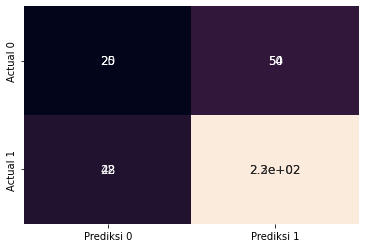

In [ ]:
score = {
    'Akurasi':[],
    'Presisi_mi':[],
    'Recall_mi':[],
    'F1_mi':[],
    'Presisi_ma':[],
    'Recall_ma':[],
    'F1_ma':[]
}
 
start_time = time.time()
list_score_lstm = []
index_fold = 1

for train_index_sentimen, test_index_sentimen in kf.split(np.array(X_train), y_train):  
  # pembagian data train dan data test
  X_train_sentimen, X_test_sentimen = np.array(X_train)[train_index_sentimen], np.array(X_train)[test_index_sentimen]
  y_train_tr_sentimen, y_test_ts_sentimen = y_train_tr[train_index_sentimen], y_train_tr[test_index_sentimen]
  
  # train model
  train, hist = LSTMmodel_sentimen(X_train_sentimen,y_train_tr_sentimen,X_test_sentimen,y_test_ts_sentimen, index_fold)
  
  model = load_model('/content/drive/MyDrive/1 Rizki Folder/Hibah bersama Dosen/result_baru/'+str(nama_sentimen)+'/Fold'+str(index_fold)+'.h5')
  
  # prediksi
  pred_y = train.predict(X_test_sentimen).argmax(axis=1)
  test_y = y_test_ts_sentimen.argmax(axis=1)

  # print('\n'+'-'*45)
  print('confusion matrix ' + 'Fold ke-' + str(index_fold))
  print('-'*45,'\n')
  cm = confusion_matrix(test_y, pred_y)
  # save confusion matrix
  savetxt('/content/drive/MyDrive/1 Rizki Folder/Hibah bersama Dosen/result_baru/'+str(nama_sentimen)+'/cm_Fold_'+str(index_fold)+'.csv', cm, delimiter=',')
  
  # print(plot(test_y, pred_y),'\n')
  # plot(test_y, pred_y).figure.savefig('/content/drive/My Drive/Thesis/Tesis/program/data/dataset/new_dataset/result_baru/'+str(nama_sentimen)+'/plot_Fold_'+str(index_fold)+'.png')
  acc, prec_mi,prec_ma, recc_mi,recc_ma, f_1_mi,f_1_ma = hitung_score_multiclass(test_y,pred_y)
  # target_names = ['class 0', 'class 1', 'class 2']
  # print(classification_report(test_y, pred_y, target_names=target_names, digits=4))

  score['Akurasi'].append(acc)
  score['Presisi_mi'].append(prec_mi)
  score['Recall_mi'].append(recc_mi)
  score['F1_mi'].append(f_1_mi)
  score['Presisi_ma'].append(prec_ma)
  score['Recall_ma'].append(recc_ma)
  score['F1_ma'].append(f_1_ma)
  from termcolor import colored
  print(colored("Score fold ke-" + str(index_fold), 'red', attrs=['bold']),'\n',
        'acc training  : ' + str(acc) + "%",'\n',
        'Prec Micro  : '+ str(prec_mi)+ "%", '\n',
        'Prec Macro  : '+ str(prec_ma)+ "%",'\n',
        'recc Micro  : '+ str(recc_mi)+ "%", '\n',
        'recc Macro  : '+ str(recc_ma)+ "%", '\n',
        'f_1 Micro  : '+ str(f_1_mi)+ "%",'\n',
        'f_1 Macro  : '+ str(f_1_ma)+ "%",'\n')

  index_fold += 1  

finish_time = time.time()
print('Elapsed time: {}'.format(timedelta(seconds=finish_time-start_time)))

# list_of_floats = [float(item) for item in akurasi_arr_aspek]
print('-'*100,'\n')
print('\n','Rata-rata Score :')
print(' acc training: ' + str(np.mean(score['Akurasi'])) + "%", '\n',
      'Prec Micro: ' + str(np.mean(score['Presisi_mi'])) + "%", '\n',
      'Prec Macro: ' + str(np.mean(score['Presisi_ma'])) + "%", '\n',
      'Recall Micro: ' + str(np.mean(score['Recall_mi'])) + "%", '\n',
      'Recall Macro: ' + str(np.mean(score['Recall_ma'])) + "%", '\n',
      'F1 Micro: ' + str(np.mean(score['F1_mi'])) + "%", '\n',    
      'F1 Macro: ' + str(np.mean(score['F1_ma'])) + "%", '\n',
      )
print("Fold-1 : " +str(score['Akurasi'][0]) + "%", 
      "Fold-2 : " + str(score['Akurasi'][1]) + "%")
      # "Fold-3 : " + str(score['Akurasi'][2]) + "%",
      # "Fold-4 : " + str(score['Akurasi'][3]) + "%", 
      # "Fold-5 : " + str(score['Akurasi'][4]) + "%")

## 6.6.Prediksi model

Pengujian sentiment_fasilitas  :

--------------------------------------------------
confusion matrix : sentiment_fasilitas
--------------------------------------------------
AxesSubplot(0.125,0.125;0.775x0.755) 

TP : [  2 126   0] TN : [126   2 168] FP : [ 1 39  0] FN : [39  1  0] 

Model Terbaik Fold ke-1 
 Akurasi  : 76.19% 
 Presisi Micro  : 76.19% 
 Presisi Macro  : 76.19% 
 Recall Micro  : 76.19% 
 Recall Macro  : 71.52% 
 F1 Micro  : 52.05% 
 F1 Macro  : 47.699999999999996% 



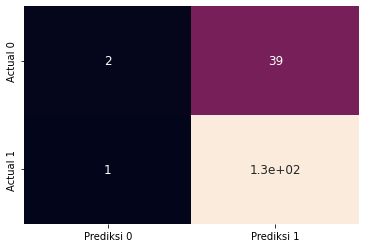

In [ ]:
#Pengujian
indeks=np.where(score["Akurasi"]==np.amax(score['Akurasi']))[0]
model = load_model('/content/drive/MyDrive/1 Rizki Folder/Hibah bersama Dosen/result_baru/'+str(nama_sentimen)+'/Fold'+str(indeks[0]+1)+'.h5')

pred_y = model.predict(np.array(X_test)).argmax(axis=1)
test_y = y_test_tr.argmax(axis=1)
print(colored("Pengujian " + str(nama_sentimen), 'red', attrs=['bold'])," :")
acc, prec_mi,prec_ma, recc_mi,recc_ma, f_1_mi,f_1_ma = hitung_score_multiclass(test_y,pred_y)

# target_names = ['class 0', 'class 1', 'class -1']
# print(classification_report(test_y, pred_y, target_names=target_names, digits=4))

from termcolor import colored
print("Model Terbaik Fold ke-" +str(indeks[0]+1, ),'\n',
      'Akurasi  : ' + str(acc*100) + "%",'\n',
      'Presisi Micro  : '+ str(prec_mi*100)+ "%", '\n',
      'Presisi Macro  : '+ str(prec_ma*100)+ "%",'\n',
      'Recall Micro  : '+ str(recc_mi*100)+ "%", '\n',
      'Recall Macro  : '+ str(recc_ma*100)+ "%", '\n',
      'F1 Micro  : '+ str(f_1_mi*100)+ "%",'\n',
      'F1 Macro  : '+ str(f_1_ma*100)+ "%",'\n')

In [ ]:
path_data_aspek = "/content/drive/My Drive/Thesis/Tesis/program/data/dataset/dataset_aspek.csv" 
#read dataset
data_aspek = pd.read_csv(path_data_aspek, sep=";", header=[0], encoding="UTF-8")

In [ ]:
data_aspek_kontinuitas = data_aspek['kontinuitas']
nama_aspek = nameof(data_aspek_kontinuitas)

In [ ]:
#Pengujian
indeks=np.where(score["Akurasi"]==np.amax(score['Akurasi']))[0]
model = load_model('/content/drive/My Drive/Thesis/Tesis/program/data/model/model_lstm/pengujian/final model/'+str(nama_aspek)+'/Fold'+str(indeks[0]+1)+'.h5')

pred_y = model.predict(X_test).argmax(axis=1)
test_y = y_test_tr.argmax(axis=1)

print('confusion matrix :')
print('-'*20,'\n')
print(confusion_matrix(test_y, pred_y))
acc, prec, recc, f_1 = hitung_score_aspek(test_y,pred_y)

from termcolor import colored
print(colored("Pengujian", 'red', attrs=['bold']),'\n',
      'Model Terbaik Fold ke-' +str(indeks[0]+1, ),'\n',
      'Akurasi  : ' + str(acc) + "%","\n",
      'Presisi  : '+ str(prec)+ "%","\n", 
      'Recall  : '+ str(recc)+ "%","\n", 
      'F1 Score  : '+ str(f_1)+ "%",'\n')

confusion matrix :
-------------------- 

[[0 0]
 [2 0]]
True Negatif : 0 False Positif : 0 False Negatif : 2 True Positif : 0 

Pengujian 
 Model Terbaik Fold ke-1 
 Akurasi  : 0.0% 
 Presisi  : nan% 
 Recall  : 0.0% 
 F1 Score  : nan% 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  


# 8.Implementasi LSTM(secara sequences)

## 8.1.Arsitektur LSTM ASPEK 

In [ ]:
class READ_DATA:
  aspek = ''
  padding = ''
  data_sentimen_integritas = ""
  data_sentimen_kapabilitas = "" 
  data_sentimen_empati = ""
  data_sentimen_akseptabilitas = "" 
  data_sentimen_kontinuitas = ""
  def __init__(self, data_sentimen, padding):
    self.data_sentimen_integritas = data_sentimen['integritas']
    self.data_sentimen_kapabilitas = data_sentimen['kapabilitas']
    self.data_sentimen_empati = data_sentimen['empati']
    self.data_sentimen_akseptabilitas = data_sentimen['akseptabilitas']
    self.data_sentimen_kontinuitas = data_sentimen['kontinuitas']
    self.padding = padding

  def get_data_sentimen(self, aspek):
    data_sentimen= getattr(self, f'data_sentimen_{aspek}')
    data_sentimen_list = data_sentimen.to_list()
    # print(type(data_sentimen_list[0]))

    #filter hapus data yang tidak memiliki sentimen (-1)
    x_, y_ = [],[]    
    for i, j in zip(padding, data_sentimen_list):
        if j != -1:
            x_.append(i)
            y_.append(j)
    return x_, y_

In [ ]:
# Ubah kategori (integritas, kapabilitas, empati, kontinuitas dan akseptabilitas)
read_data = READ_DATA(data_sentimen, padding)
x_content_sentimen_lstm, y_label_sentimen_lstm = read_data.get_data_sentimen('kontinuitas')

NameError: ignored

### Load data Y aspek dan sentimen

In [ ]:
#Panggil Data target aspek (y)
data_aspek_lstm_integritas = data_aspek['integritas']
data_aspek_lstm_kapabilitas = data_aspek['kapabilitas']
data_aspek_lstm_empati = data_aspek['empati']
data_aspek_lstm_akseptabilitas = data_aspek['akseptabilitas']
data_aspek_lstm_kontinuitas = data_aspek['kontinuitas']

data_sentimen_lstm_integritas = data_sentimen['integritas']
data_sentimen_lstm_kapabilitas = data_sentimen['kapabilitas']
data_sentimen_lstm_empati = data_sentimen['empati']
data_sentimen_lstm_akseptabilitas = data_sentimen['akseptabilitas']
data_sentimen_lstm_kontinuitas = data_sentimen['kontinuitas']


### split k-fold aspek

In [ ]:
# Cross-validasi
kf = StratifiedKFold(n_splits=5)#,shuffle=True, random_state=None) # Define the split - into 5 folds 
kf.get_n_splits(X_train) # returns the number of splitting iterations in the cross-validator
print(kf) 

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


### split k-fold sentimen

In [ ]:
# convet data x to np.array dan y to pd.series
x_sentimen_np_lstm = np.array(x_content_sentimen_lstm)
y_sentimen_srs_lstm = pd.Series(y_label_sentimen_lstm)

In [ ]:
# Cross-validasi
kf = StratifiedKFold(n_splits=5)#,shuffle=True, random_state=None) # Define the split - into 5 folds 
kf.get_n_splits(X_train) # returns the number of splitting iterations in the cross-validator
print(kf) 

KFold(n_splits=5, random_state=None, shuffle=True)


In [ ]:
# parameter ASPEK
lr_param_seq            = 5e-5
batchsize_param_seq     = 15
dropout_param_seq       = 0.5
output_neuron_param_seq = 2

input_neuron_param_seq  = 20
l2_param_seq            = 1e-4
epoch_param_seq         = 20

In [ ]:
# menyimpan model dengan akurasi tertinggi
mcp = [ModelCheckpoint(filepath=
                       '/content/drive/My Drive/Thesis/Tesis/program/data/model/hapus/seq_aspek_integritas_n100_l21e-3_e125.h5',verbose=2, monitor='val_accuracy', save_best_only=True, mode='max')]

# fungsi arsitektur LSTM
def LSTMmodel_sentimen_seq(X_train_aspekseq, y_train_aspekseq,X_test_aspekseq, y_test_aspekseq):
  # print(y_train)
  #defined model
  model = Sequential()
  model.add(Embedding(input_dim = jumlah_index,
                      output_dim = EMBEDDING_DIM, 
                      weights = [embedding_matrix], 
                      input_length = max_len_word,
                      trainable=False)) 
  model.add(LSTM(input_neuron_param_seq, return_sequences=False))
  model.add(Dropout(dropout_param_seq))
  # model.add(Dense(50, activation='relu'))
  model.add(Dense(output_neuron_param_seq, 
                  activation='softmax', 
                  kernel_regularizer=regularizers.l2(l2_param_seq))) 
  model.summary()

  #compile & fit model
  adam = Adam(lr=lr_param_seq, beta_1=0.9, beta_2=0.999)
  model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
  history = model.fit(X_train_aspekseq, y_train_aspekseq,
                      validation_data = (X_test_aspekseq, y_test_aspekseq), 
                      epochs = epoch_param_seq, 
                      batch_size = batchsize_param_seq, 
                      verbose = 2, 
                      callbacks = mcp)
 
  #evaluate the model
  scores = model.evaluate(X_test_aspekseq, y_test_aspekseq, verbose=1)
  
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.savefig('/content/drive/My Drive/Thesis/Tesis/program/data/model/hapus/seq_aspek_integritas_n100_l21e-3_e125.jpg', 
              bbox_inches='tight', dpi=150)
  plt.show()
  
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='bottom left')
  plt.savefig('/content/drive/My Drive/Thesis/Tesis/program/data/model/hapus/loss_seq_aspek_integritas_n100_l21e-3_e125.jpg',
              bbox_inches='tight', dpi=150)
  plt.show()
  return history,model

## 8.2.Arsitektur LSTM Sentimen

In [ ]:
# parameter
lr_param_sentimen_seq            = 1e-3
batchsize_param_sentimen_seq     = 15
dropout_param_sentimen_seq       = 0.5
output_neuron_param_sentimen_seq = 2

input_neuron_param_sentimen_seq  = 20
l2_param_sentimen_seq            = 1e-3
epoch_param_sentimen_seq         = 10

In [ ]:
# menyimpan model dengan akurasi tertinggi
mcp = [ModelCheckpoint(filepath=
                       '/content/drive/My Drive/Thesis/Tesis/program/data/model/hapus/sentimen_integritas_n100_l21e-3_e125.h5',verbose=2, monitor='val_accuracy', save_best_only=True, mode='max')]

# fungsi arsitektur LSTM
def LSTMmodel_sentimen_seq(X_train_sentimenseq, y_train_sentimenseq, X_test_sentimenseq, y_test_sentimenseq):
  # print(y_train)
  #defined model
  model = Sequential()
  model.add(Embedding(input_dim = jumlah_index,
                      output_dim = EMBEDDING_DIM, 
                      weights = [embedding_matrix], 
                      input_length = max_len_word,
                      trainable=False)) 
  model.add(LSTM(input_neuron_param_sentimen_seq, return_sequences=False))
  model.add(Dropout(dropout_param_sentimen_seq))
  # model.add(Dense(50, activation='relu'))
  model.add(Dense(output_neuron_param_sentimen_seq, 
                  activation='softmax', 
                  kernel_regularizer=regularizers.l2(l2_param_sentimen_seq))) 
  model.summary()

  #compile & fit model
  adam = Adam(lr=lr_param_sentimen_seq, beta_1=0.9, beta_2=0.999)
  model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
  history = model.fit(X_train_sentimenseq, y_train_sentimenseq,
                      validation_data = (X_test_sentimenseq, y_test_sentimenseq), 
                      epochs = epoch_param_sentimen_seq, 
                      batch_size = batchsize_param_sentimen_seq, 
                      verbose = 2, 
                      callbacks = mcp)
 
  #evaluate the model
  scores = model.evaluate(X_test_sentimenseq, y_test_sentimenseq, verbose=1)
  
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.savefig('/content/drive/My Drive/Thesis/Tesis/program/data/model/hapus/sentimen_integritas_n100_l21e-3_e125.jpg', 
              bbox_inches='tight', dpi=150)
  plt.show()
  
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='bottom left')
  plt.savefig('/content/drive/My Drive/Thesis/Tesis/program/data/model/hapus/loss_sentimen_integritas_n100_l21e-3_e125.jpg',
              bbox_inches='tight', dpi=150)
  plt.show()
  return history,model

## 8.3.Training LSTM secara Sequence

In [ ]:
def hitung_score_multiclass(y_test, y_pred):
    cm = metrics.confusion_matrix(y_test, y_pred,labels=[-1,0,1])
    print(cm)
    total_true = np.sum(cm, axis=1)
    total_pred = np.sum(cm, axis=0)
    tp_a = cm[0][0]
    tp_b = cm[1][1]
    tp_c = cm[2][2]
    st_a = total_true[0]
    st_b = total_true[1]
    st_c = total_true[2]
    sp_a = total_pred[0]
    sp_b = total_pred[1]
    sp_c = total_pred[2]

    acc = (tp_a + tp_b + tp_c) / np.sum(total_true) * 100
    prec = (tp_c / sp_c) * 100
    recc = (tp_c / st_c) * 100
    f1 = 2 * (prec * recc) / (prec + recc)
    return  round(acc,2) , round(prec,2), round(recc,2), round(f_1,2)

In [ ]:
test_y_aspek = 0
acc_t = 0
prec_t = 0
recc_t = 0
f_1_t = 0
read_data = READ_DATA(data_sentimen, padding)
for data_category in ['integritas']: # 'kapabilitas', 'empati', 'akseptabilitas','kontinuitas'
  print('\n',"================"+data_category+"==========================")
  y_aspek = data_aspek[data_category]
  x_content_sentimen, y_label_sentimen = read_data.get_data_sentimen(data_category)

  # convet data x to np.array dan y to pd.series
  x_sentimen_np = np.array(x_content_sentimen)
  y_sentimen_s = pd.Series(y_label_sentimen)
  x_sentimen = x_sentimen_np
  y_sentimen = y_sentimen_s

  # kfold
  kf = KFold(n_splits=5)
  kf_number = 0

  for (train_aspek, test_aspek),(train_sentimen, test_sentimen) in zip(kf.split(x_aspek),kf.split(x_sentimen)):  
    # data training aspek
    kf_number += 1
    print("K = "+str(kf_number))
    X_train_aspek, X_test_aspek = x_aspek[train_aspek], x_aspek[test_aspek]
    y_train_tr_aspek, y_test_ts_aspek = y_aspek[train_aspek], y_aspek[test_aspek]

    # data training sentimen
    X_train_sentimen, X_test_sentimen = x_sentimen[train_sentimen], x_sentimen[test_sentimen]
    y_train_tr_sentimen, y_test_ts_sentimen = y_sentimen_s[train_sentimen], y_sentimen_s[test_sentimen]

    # ubah y_train dan y-test kedlam one-hot encode using to_categorical ASPEK
    y_train_tr_aspek = to_categorical(y_train_tr_aspek, num_classes=2)
    y_test_ts_aspek = to_categorical(y_test_ts_aspek, num_classes=2)

    # ubah y_train dan y-test kedlam one-hot encode using to_categorical SENTIMEN
    y_train_tr_sentimen = to_categorical(y_train_tr_sentimen, num_classes=2)
    y_test_ts_sentimen = to_categorical(y_test_ts_sentimen, num_classes=2)

    # history & train ASPEK
    model_aspek = load_model('/content/drive/My Drive/Thesis/Tesis/program/data/model/model_lstm/pengujian/final model/'+str(nama_aspek)+'/Fold'+str(indeks[0]+1)+'.h5')
    model_sentimen = load_model('/content/drive/My Drive/Thesis/Tesis/program/data/model/model_lstm/pengujian/final model/'+str(nama_sentimen)+'/Fold'+str(indeks[0]+1)+'.h5')
    history, train_aspek = LSTMmodel_sentimen_seq(X_train_aspek,y_train_tr_aspek,X_test_aspek,y_test_ts_aspek)
    test_aspek = train_aspek.evaluate(x=X_test_aspek, y=y_test_ts_aspek)

    # Prediksi 
    pred_y_aspek = train_aspek.predict(X_test_sentimen).argmax(axis=1)
    test_y_aspek = np.ones((len(X_test_sentimen),), dtype=int) #prediksi aspek menggunakan data tes sentimen

    # konversi label menjadi -1 (jika hasil/ label predisi pada klasifikasi aspek tidak sama dengan label data asli, maka hasil prediksi ubah menjadi =-1)
    for i,j in enumerate(pred_y_aspek) :
      if pred_y_aspek[i] != test_y_aspek[i]:
        pred_y_aspek[i] = -1

    print(pred_y_aspek)
    print(test_y_aspek)

    # jika label = 1, maka lanjut ke klasifikasi sentimen (history & train SENTIMEN)
    history, train_sentimen = LSTMmodel_sentimen_seq(X_train_sentimen,y_train_tr_sentimen,X_test_sentimen,y_test_ts_sentimen)
    test_sentimen = train_sentimen.evaluate(x=X_test_sentimen, y=y_test_ts_sentimen)

    pred_y_sentimen = train_sentimen.predict(X_test_sentimen).argmax(axis=1)
    test_y_sentimen = y_test_ts_sentimen.argmax(axis=1)


    # konversi label menjadi -1 (Jika hasil pred di klasifikasi aspek = -1, maka pred di klasifikasi sentimen juga = -1)
    for i,j in enumerate(pred_y_aspek) :
      if pred_y_aspek[i] == -1:
        pred_y_sentimen[i] = -1

    print(pred_y_sentimen)
    print(test_y_sentimen)

    acc, prec, recc, f_1 = hitung_score_multiclass(test_y_sentimen,pred_y_sentimen)
    
    acc_t += acc
    prec_t += prec
    recc_t += recc
    f_1_t += f_1
    
    print("Score tiap fold : ",'\n',"acc: " + str(acc), ' Prec: '+ str(prec), ' recc : '+ str(recc), 'f_1 : '+ str(f_1),'\n')

    tf.keras.backend.clear_session()
    
  print('\n','Rata-rata Score :')
  print("acc: " + str(round(acc_t/5,2))+"%", ' Prec: '+ str(round(prec_t/5,2))+"%", ' recc : '+ str(round(recc_t/5,2))+"%", 'f_1 : '+ str(round(f_1_t/5,2))+"%")

NameError: ignored

# 9.Implementasi Naive Bayes (Klasifikasi Aspek)



## 9.1.pembuatan vector kata

In [ ]:
# pembuatan vector kata
vectorizer = CountVectorizer()
reviews2 = [" ".join(r) for r in reviews]
vektor_tfidf = vectorizer.fit_transform(reviews2)

In [ ]:
print(vectorizer.get_feature_names())
for data in vektor_tfidf.toarray()[:1][0]:
  if data != 0:
    print(data, end=' ')

['aaaaa', 'aaah', 'aaamiin', 'aadhitadhit', 'aamiino', 'abangjayok', 'abbas', 'abdi', 'abdul', 'abdussakur', 'abenbella', 'abraham', 'abramantyo', 'aburizal', 'aburizalbakrie', 'acara', 'account', 'aceh', 'acenghusni', 'acit', 'act', 'acuh', 'adaah', 'adab', 'addeleandro', 'adegan', 'adek', 'adha', 'adhit', 'adhityantoro', 'adi', 'adiannapitupulu', 'adidaya', 'adil', 'adili', 'adilmandiri', 'adilnya', 'adiltegas', 'adinda', 'aditrafianto', 'aditryan', 'adu', 'aduh', 'adui', 'afrialsyarlee', 'agama', 'agamanya', 'agamisharmonis', 'agnezmo', 'agree', 'agresif', 'agung', 'agus', 'ah', 'aher', 'ahli', 'ahmad', 'ahok', 'aidiote', 'aih', 'aihh', 'ain', 'air', 'ajak', 'ajang', 'ajar', 'ajari', 'aji', 'ajitriwikongko', 'ajongajeng', 'ajukan', 'akal', 'akalin', 'akbar', 'akbarfaizal', 'akhlak', 'akibat', 'akil', 'akimalam', 'akin', 'akrobat', 'aksi', 'aktfits', 'aktif', 'aktivis', 'aktivitas', 'aktor', 'aktual', 'aktualco', 'akui', 'akuindonesia', 'akun', 'akunnya', 'ala', 'alaikum', 'alam', 'a

## 9.2.split k-fold

In [ ]:
# data_nvb_integritas = data_sentimen_integritas['integritas']
# data_nvb_kapabilitas = data_sentimen_kapabilitas['kapabilitas']
# data_nvb_empati = data_sentimen_empati['empati']
# data_nvb_akseptabilitas = data_sentimen_akseptabilitas['akseptabilitas']
# data_nvb_kontinuitas = data_sentimen_kontinuitas['kontinuitas']

sentimen_integritas = data_sentimen['integritas'].tolist()
sentimen_integritas = [sentimen_integritas[i] for i in np.ravel(np.where(np.array(sentimen_integritas)!=-1))]

sentimen_kapabilitas = data_sentimen['kapabilitas']
sentimen_kapabilitas = [sentimen_kapabilitas[i] for i in np.ravel(np.where(np.array(sentimen_kapabilitas)!=-1))]

sentimen_empati = data_sentimen['empati']
sentimen_empati = [sentimen_empati[i] for i in np.ravel(np.where(np.array(sentimen_empati)!=-1))]

sentimen_akseptabilitas = data_sentimen['akseptabilitas']
sentimen_akseptabilitas = [sentimen_akseptabilitas[i] for i in np.ravel(np.where(np.array(sentimen_akseptabilitas)!=-1))]

sentimen_kontinuitas = data_sentimen['kontinuitas']
sentimen_kontinuitas = [sentimen_kontinuitas[i] for i in np.ravel(np.where(np.array(sentimen_kontinuitas)!=-1))]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split([vektor_tfidf[i] for i in np.ravel(np.where(np.array(sentimen_integritas)!=-1))], sentimen_integritas, test_size=0.2)
nama = nameof(sentimen_integritas)
# y_train = y_train.to_numpy()
# y_test = y_test.to_numpy()
# y_train_tr = to_categorical(y_train, num_classes=2)
# y_test_tr = to_categorical(y_test, num_classes=2)
# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

In [ ]:
type(X_test)

list

In [ ]:
# Cross-validasi
kf = StratifiedKFold(n_splits=5,shuffle=True, random_state=None) # Define the split - into 5 folds 
# skf = StratifiedKFold(n_splits=3)
kf.get_n_splits(X_train) # returns the number of splitting iterations in the cross-validator
print(kf)

StratifiedKFold(n_splits=5, random_state=None, shuffle=True)


In [ ]:
# # K-Fold
# x_aspek_nvb = vektor_tfidf # nilai x merupakan hasil vektor dari content tweet
# y_aspek_nvb = data_nvb_integritas # label aspek integritas
# nama = nameof(data_nvb_integritas)
# kf_nvb = KFold(n_splits=5,shuffle=True, random_state=None) # Define the split - into 5 folds 
# kf_nvb.get_n_splits(x_aspek_nvb) # returns the number of splitting iterations in the cross-validator
# print(kf_nvb)

KFold(n_splits=5, random_state=None, shuffle=True)


## 9.3.Training Naive Bayes

In [ ]:
# fungsi confusion matrix
def hitung_score_nvb(y_test, y_pred):
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    # print(fp, tp)
    acc_nvb = (tp+tn) / (tp + fp + tn + fn)
    prec_nvb = tp / (tp + fp)
    recc_nvb = tp / (tp + fn)
    f_1_nvb = 2 * (prec_nvb * recc_nvb) / (prec_nvb + recc_nvb)
    return acc_nvb, prec_nvb, recc_nvb, f_1_nvb

In [ ]:
kf_nvb_number = 0
akurasi_nvb_arr = []
prec_nvb_arr = []
rec_nvb_arr = []
f1_nvb_arr = []
 
for train_aspek_nvb, test_aspek_nvb in kf.split(X_train, y_train):
  X_train_aspek_nvb, X_test_aspek_nvb = X_train[train_aspek_nvb], X_train[test_aspek_nvb]
  y_train_aspek_nvb, y_test_aspek_nvb = y_train[train_aspek_nvb], y_train[test_aspek_nvb]
 
  kf_nvb_number += 1
 
  # train model
  clf = MultinomialNB()
  clf.fit(X_train_aspek_nvb, y_train_aspek_nvb)
 
  # save model
  model_nvb = 'tfidf_aspek_integritas_nvb.sav'
  pickle.dump(clf, open('/content/drive/My Drive/Thesis/Tesis/program/data/model/NVB/tfidf_{}_nvb.pkl'.format(nama), 'wb'))
 
  # pengujian
  pred_y_nvb = clf.predict(X_test_aspek_nvb)
  cm = metrics.confusion_matrix(y_test_aspek_nvb, pred_y_nvb, labels=[0,1])
  
  prediction = clf.predict(X_test_aspek_nvb)
  label_asli = y_test_aspek_nvb

  # print(prediction[:9])
  # print(y_test_aspek_nvb[:9])
 
  print("Score fold ke-" + str(kf_nvb_number),'\n')
  print("Naive Bayes Accuracy Score -> ", str(float("%.2f" % round(accuracy_score(pred_y_nvb, y_test_aspek_nvb)*100, 2))) + " %")
  print("Naive Bayes Precission Score -> ", str(float("%.2f" % round(precision_score(pred_y_nvb, y_test_aspek_nvb, average='macro')*100, 2)))+ " %")
  print("Naive Bayes Recall Score -> ", str(float("%.2f" % round(recall_score(pred_y_nvb, y_test_aspek_nvb, average='macro')*100, 2)))+ " %")
  print("Naive Bayes F1 Measurement Score -> ", str(float("%.2f" % round(f1_score(pred_y_nvb, y_test_aspek_nvb, average='macro')*100, 2)))+ " %" + "\n")
  
  print("confusion matrix :")
  print(confusion_matrix(label_asli, prediction))
  print("\n","True positif : " + str(cm[0][0]), "\n",
        "True negatif : " + str(cm[0][1]), "\n",
        "False positif : " + str(cm[1][0]), "\n",
        "False negatif : " + str(cm[1][1]))
   
  akurasi_nvb_arr.append(accuracy_score(pred_y_nvb, y_test_aspek_nvb))
  prec_nvb_arr.append(precision_score(pred_y_nvb, y_test_aspek_nvb,average='macro'))
  rec_nvb_arr.append(recall_score(pred_y_nvb, y_test_aspek_nvb,average='macro'))
  f1_nvb_arr.append(f1_score(pred_y_nvb, y_test_aspek_nvb,average='macro'))
  
  print('-'*100,'\n')
  
print("Akurasi Model NVB (K-Fold) : " + str(round(np.mean(akurasi_nvb_arr)*100,2)), "%")
print("Precision K-Fold : " + str(round(np.mean(prec_nvb_arr)*100,2)), "%")
print("Recall K-Fold : " + str(round(np.mean(rec_nvb_arr)*100,2)), "%")
print("F1 K-Fold : " + str(round(np.mean(f1_nvb_arr)*100,2)), "%")

TypeError: ignored

## 9.4.confusion matrix

## 9.5.Load Model and Final Result

In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Thesis/Tesis/program/data/model/NVB/tfidf_aspek_integritas_nvb.pkl', 'rb'))
result = loaded_model.predict(X_test_aspek_nvb)
acc_nvb, prec_nvb, recc_nvb, f_1_nvb = hitung_score_nvb(y_test_aspek_nvb,result)
print("hasil prediksi : ")
print(result)
print('\n')
# print(acc_nvb,prec_nvb,recc_nvb, f_1_nvb)
print("akurasi prediksi : " + str(round(acc_nvb*100,2)), "%")
print("precision prediksi : " + str(round(prec_nvb*100,2)), "%")
print("recall prediksi : " + str(round(recc_nvb*100,2)), "%")
print("f1 prediksi : " + str(round(f_1_nvb*100,2)), "%")

hasil prediksi : 
[0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1
 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0
 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1
 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1
 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1
 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1
 0 0 1 0 0 0 0 1 0 1]


akurasi prediksi : 91.08 %
precision prediksi : 89.8 %
recall prediksi : 93.62 %
f1 prediksi : 91.67 %


## 9.6.Hasil Prediksi

In [ ]:
prediction = clf.predict(X_test_aspek_nvb)
for aspek, actual_label, result in zip(reviews2, y_test_aspek_nvb, prediction):
  if np.argmax(to_categorical(actual_label, num_classes=2)) != np.argmax(result):
    print('content : {}'.format(aspek))
    print('actual_label : {}'.format(actual_label))
    print('prediksi : {}'.format(result))
    print('-'*150)

content : megawati calon kandidat presiden kuat menurutku nan diantigamartil
actual_label : 1
prediksi : 1
------------------------------------------------------------------------------------------------------------------------------------------------------
content : mahfud md berpeluang kuat cawapres
actual_label : 1
prediksi : 1
------------------------------------------------------------------------------------------------------------------------------------------------------
content : mahfud md semangat
actual_label : 1
prediksi : 1
------------------------------------------------------------------------------------------------------------------------------------------------------
content : rahmat gobel mahfud md cakap tuh timbosiahaan vote rachmatgobel kahfi siregar ilham bintang
actual_label : 1
prediksi : 1
------------------------------------------------------------------------------------------------------------------------------------------------------
content : jusuf kalla m

# 10.Implementasi Naive Bayes (klasifikasi sentimen)

## 10.1.load tf-idf

## 10.2.split k-fold

## 10.3.pembuatan vector kata

## 10.4.confusion matrix

## 10.5.training naive bayes